In [1]:
import sys
import os

#os.environ['PROJ_LIB']=r'C:\Users\21542\AppData\Local\Continuum\anaconda3\Library\share'
os.environ['PROJ_LIB']=r'C:\Users\Serge\Anaconda3\Library\share'
from datetime import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import folium
import json

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Загрузите агрегированные данные о поездках в мае 2016

In [2]:
#данные по регионам Нью-Йорка и таблица по распределению поездок по часам и регионам
reg = pd.read_csv('regions.csv', sep = ';')
data_svod_step1 = pd.read_csv('data_svod1.csv')
data_svod = data_svod_step1.set_index('reg')
data_svod.head()

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
reg,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки

In [3]:
# суммирование поездок по регионам
sum_reg = []
for i in range (1,2501,1):
    sum_reg.append(data_svod.loc[i].sum())
# количество пустых значений(час - ячейка)
print('Количество ячеек из которых не совершено ни одной поездки = ',sum_reg.count(0))

Количество ячеек из которых не совершено ни одной поездки =  1283


## 2.Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

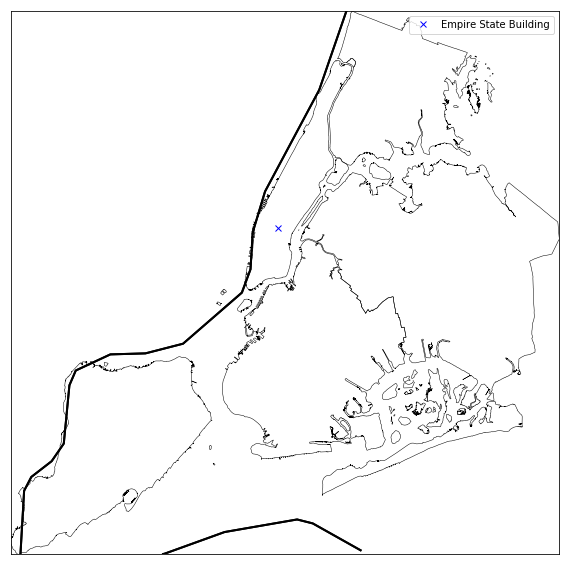

In [4]:
#Крайние координаты сетки Нью-Йорка

latitude_0=reg.south.min()
latitude_1=reg.north.max()
longitude_0=reg.west.min()
longitude_1=reg.east.max()

#Центральная точка карты

lat = (latitude_0+latitude_1)/2
lon = (longitude_0+longitude_1)/2

#Координаты Эмайер-Стейт-Билдинг

fig, axes = plt.subplots(figsize = (10,10))
m = Basemap(llcrnrlon=longitude_0,llcrnrlat=latitude_0,urcrnrlon=longitude_1,urcrnrlat=latitude_1,
             resolution='h', projection='tmerc', lat_0 = lat, lon_0 = lon)
x,y = m([-73.9856644], [40.7484405])
m.drawstates(linewidth=2, color='black')
#m.readshapefile(r'C:\Users\21542\OneDrive\Stepik\6. Final_prj\Step2_map\geo_export\geo_export', 'geo_export', drawbounds = True)
m.readshapefile(r'C:\Users\Serge\Documents\python\Step2_map\geo_export\geo_export', 'geo_export', drawbounds = True)
m.plot(x,y, marker="x", color="blue", label="Empire State Building", ls="")
axes.legend()
plt.show()

## 3.Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

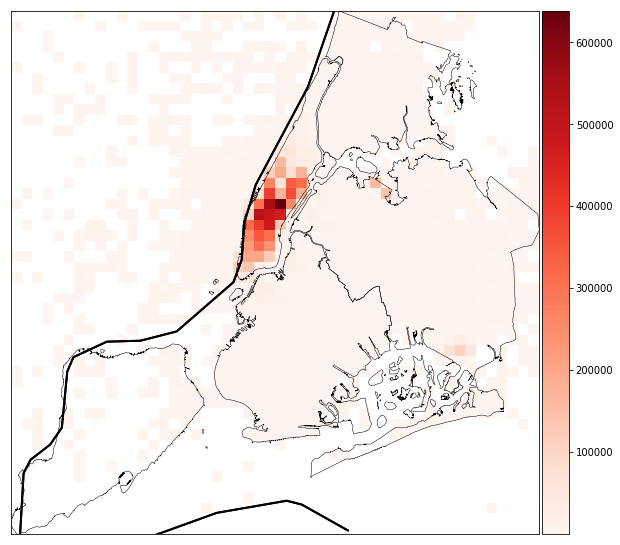

In [5]:
#заполнение квадратной матрицы для цветов исключая нулевые поездки
a = np.zeros((50, 50))
for i in range(0,50,1):
    for j in range(0,50,1):
        a[j][i] = sum_reg[i*50+j]       
masked = np.ma.masked_where(a == 0, a)
cmap = plt.get_cmap('Reds', 222222)

# отрисовка статической карты с помощью shape и basemap
fig, axes = plt.subplots(figsize = (10,10))
m = Basemap(llcrnrlon=longitude_0,llcrnrlat=latitude_0,urcrnrlon=longitude_1,urcrnrlat=latitude_1,
             resolution='h', projection='tmerc', lat_0 = lat, lon_0 = lon)
m.drawstates(linewidth=2, color='black')
#m.readshapefile(r'C:\Users\21542\OneDrive\Stepik\6. Final_prj\Step2_map\geo_export\geo_export', 'geo_export', drawbounds = True)
m.readshapefile(r'C:\Users\Serge\Documents\python\Step2_map\geo_export\geo_export', 'geo_export', drawbounds = True)

extent= (longitude_0, latitude_0, longitude_1,latitude_1 )
im = m.imshow(masked, interpolation = 'nearest', extent = extent, alpha=1, cmap=cmap)
divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

## 4.Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [6]:
m = folium.Map(location=[lat,lon], zoom_start = 10.3)
folium.Marker([40.6892494,-74.0445004], popup='<i>Statue of Liberty</i>',icon=folium.Icon(color='red')).add_to(m)
m

## 5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.
## 6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [7]:
# Расчет среднего количества поездок в час из каждой зоны
mean_reg = pd.DataFrame(columns = ['id', 'Count']) 
for i in range (1,2501,1):
    mean_reg = mean_reg.append({'id': i, 'Count':data_svod.loc[i].mean()}, ignore_index=True)
# создание geojson из данных по координатам зон(регионов)
    
reg_js = []
reg_js = reg.to_json(orient='records', 
    double_precision=12,
    date_format='iso')
json_result = json.loads(reg_js)
geojson = {
    'type': 'FeatureCollection',
    'features': []
}
for record in json_result:
    if record['region'] in mean_reg[mean_reg['Count']>=5]['id']:
        geojson['features'].append({
            'id':record['region'],
            'type': 'Feature', 
            "properties": {        
          },
            'geometry': {
                'type': 'Polygon', 
                'coordinates': 
                    [[[record['east'], record['north']], [record['west'], record['north']], [record['west'], record['south']], [record['east'], record['south']], [record['east'], record['north']]]]
                }})
# отрисовка интерактивной карты с прорисовкой зон    
folium.Choropleth(
    geo_data=geojson,
    name='choropleth',
    data=mean_reg,
    columns=['id','Count'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='ii',
    highlight = True
).add_to(m)

folium.LayerControl().add_to(m)

# Расчет и печать количества ячеек из которых в мае совершено менее 5 поездок
print('Количество ячеек из которых в мае совершено в среднем не менее 5 поездок = ', len(mean_reg[mean_reg['Count']>=5]))
m

Количество ячеек из которых в мае совершено в среднем не менее 5 поездок =  102
